In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
xdf = heart_disease.data.features 
ydf = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
xdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [5]:
ydf.head()

,num
0,0
1,2
2,1
3,0
4,0


In [ ]:
# 1
# Inductive reasoning is using observations to find trends and patterns in data and then making assumptions based on those trends without there ever
# being hard rules stating if a then b such as as square footage of houses increases on average so does the price 
# deductive reasoning is establishing rules for data such as if we are trying to determine if animals lay eggs we can say that since all birds lay eggs
# if an animal in our list is a bird it must lay eggs.


In [14]:
# 2

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [196]:
def remove_null(a):
    a = a.fillna(a.mean())
remove_null(xdf)
remove_null(ydf)

In [197]:
xdf.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [198]:
ydf.isnull().sum()

num    0
dtype: int64

In [13]:
ydf.value_counts()

num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

In [103]:
# 3
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [104]:
X = xdf
y = ydf

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train) 

In [105]:
model =tree.DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.0,  random_state=42)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.82        48
           1       0.29      0.12      0.17        17
           2       0.22      0.17      0.19        12
           3       0.36      0.50      0.42        10
           4       0.00      0.00      0.00         4

    accuracy                           0.58        91
   macro avg       0.32      0.34      0.32        91
weighted avg       0.52      0.58      0.54        91



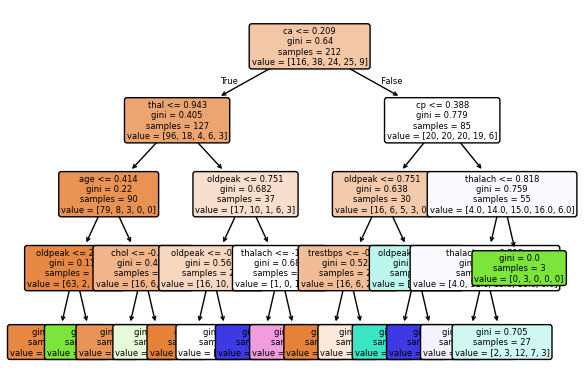

<Figure size 640x480 with 0 Axes>

In [106]:
tree.plot_tree(model, feature_names=list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig("tree.svg")

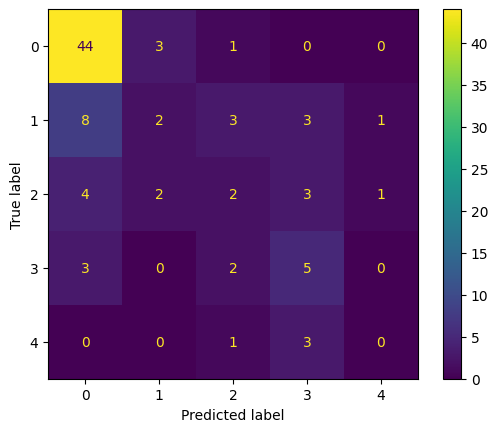

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [108]:
# while the only tuning done to the tree model was limiting the depth to 4 several others were attemted but either caused errors 
# or lowered the scores of the model

In [109]:
# 4 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [129]:
rf = RandomForestClassifier(n_estimators=90, min_samples_split=10, random_state=42)
rf = rf.fit(X_train, y_train.values.ravel())
rf.score(X_test, y_test)

0.5824175824175825

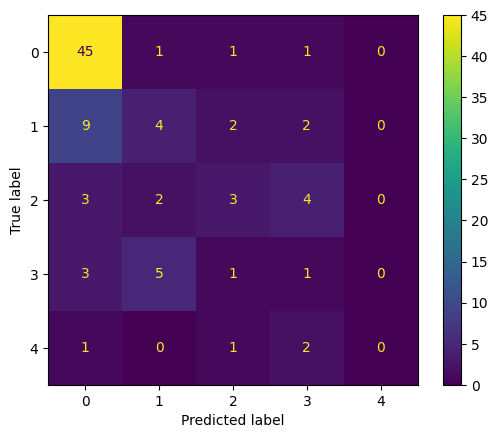

In [135]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [136]:
# min_samples_split was the only variable i could change that improved the model instead of worsening or breaking it so thats what I did 

In [142]:
# 5 
from xgboost import XGBClassifier

In [191]:
xgb = XGBClassifier(n_estimators=90, max_depth=2, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

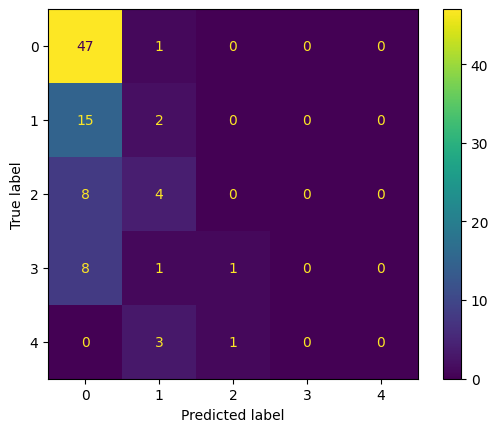

In [192]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [171]:
(2+4+1+3+1+1)/(15+8+8+2+4+1+3+1+1)

0.27906976744186046

In [ ]:
# I limmited the number of estimators to 90, gave a random state of which didn't actually do anything i just put it there and i limited the depth to 2 
# as that gave the best results for the output